# Grad Cam v1

In [1]:
from YOLOv8_Explainer import yolov8_heatmap, display_images
import matplotlib.pyplot as plt
from datasets import load_dataset
from matplotlib.pyplot import imshow
import torch
import cv2

In [2]:
# Initialize the YOLOv8 Explainer with Grad-CAM
model = yolov8_heatmap(
    weight="yolo_weights/yolov8SC.pt",  # Path to your YOLOv8 model weights
    conf_threshold=0.4,  # Confidence threshold for detections
    method="GradCAM",  # Use Grad-CAM instead of EigenCAM
    layer=[-3,-2],  # Target layers for Grad-CAM
    ratio=0.005,  # Ratio for heatmap overlay
    show_box=True,  # Show bounding boxes on the image
    renormalize=False,  # Do not renormalize the heatmap
)
dataset = load_dataset("marmal88/skin_cancer")
test_split = dataset["test"]

label_mapping = {
    "melanoma": "Malignant",
    "melanocytic_Nevi": "Malignant",
    "dermatofibroma": "Benign",
    "basal_cell_carcinoma": "Malignant",
    "vascular_lesions": "Benign",
    "actinic_keratoses": "Malignant",
    "benign_keratosis-like_lesions": "Benign"
}

Model summary: 129 layers, 11,136,374 parameters, 0 gradients, 28.6 GFLOPs


In [3]:
true_positives = [104, 53,208, 210,117,87,29]

Image 104
Image 53
Image 208
Image 210
Image 117
Image 87
Image 29


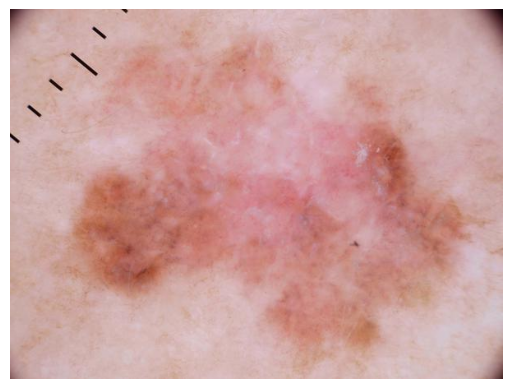

In [4]:

images = []
ground_truths = []
for i in true_positives:
    print(f"Image {i}")
    ground_truths.append(label_mapping[test_split[i]["dx"]])
    # Generate Grad-CAM heatmaps for an image
    try:
        images.append(model(
            img_path=f"true_positive_images/image_{i}.jpg",  # Path to your input image
        ))
    except Exception as e:
        print(f"Image {i} had the following error: {e}")
    img = cv2.imread(f"true_positive_images/image_{i}.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels and ticks
    # plt.show()

Image 0, with Ground Truth: Malignant


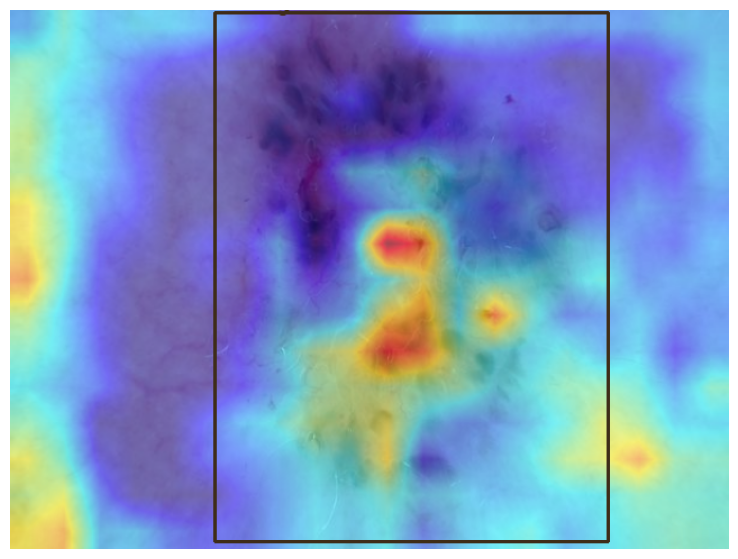

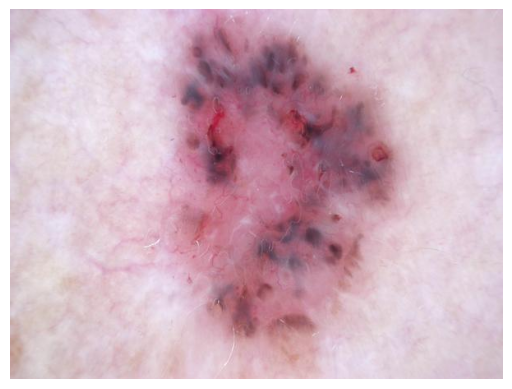

Image 1, with Ground Truth: Malignant


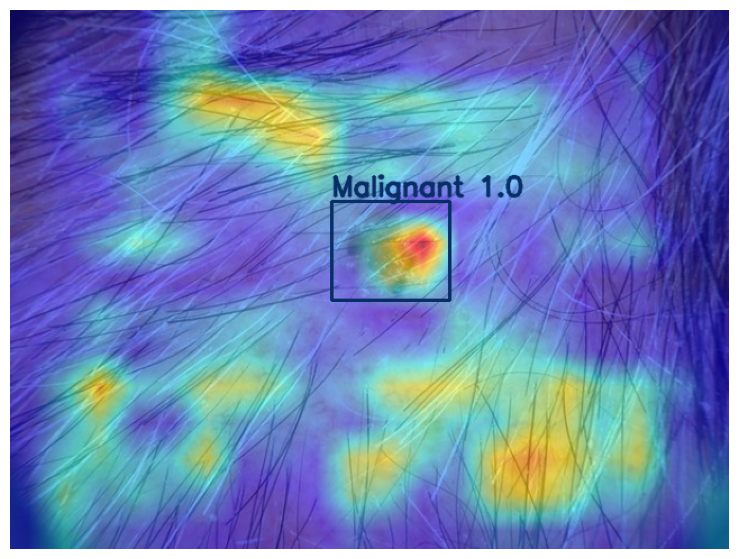

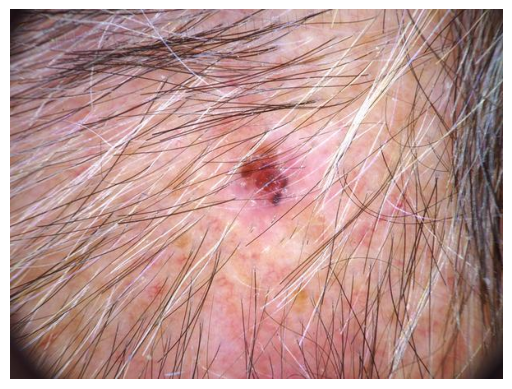

Image 2, with Ground Truth: Benign


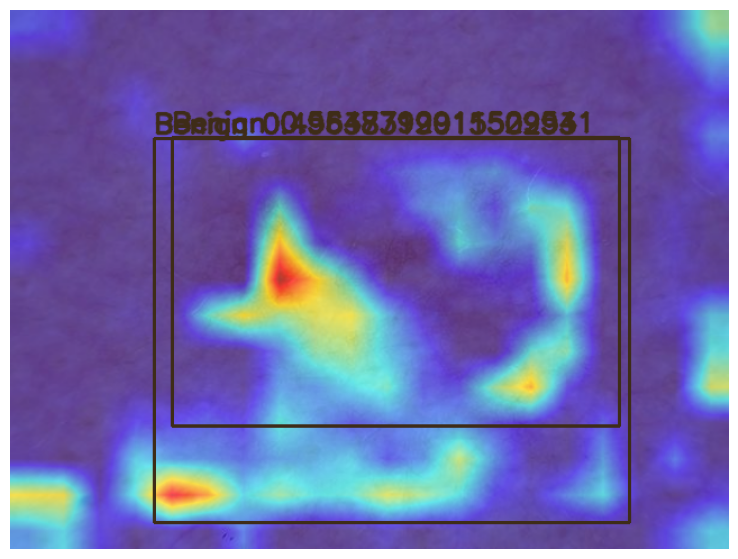

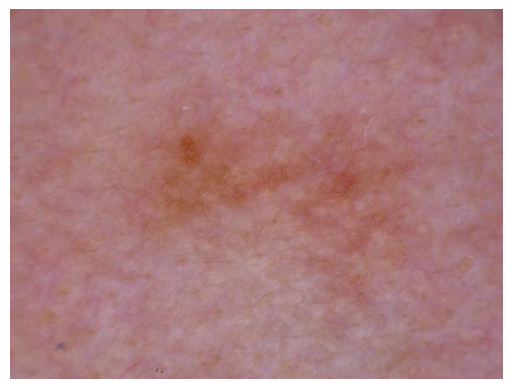

Image 3, with Ground Truth: Benign


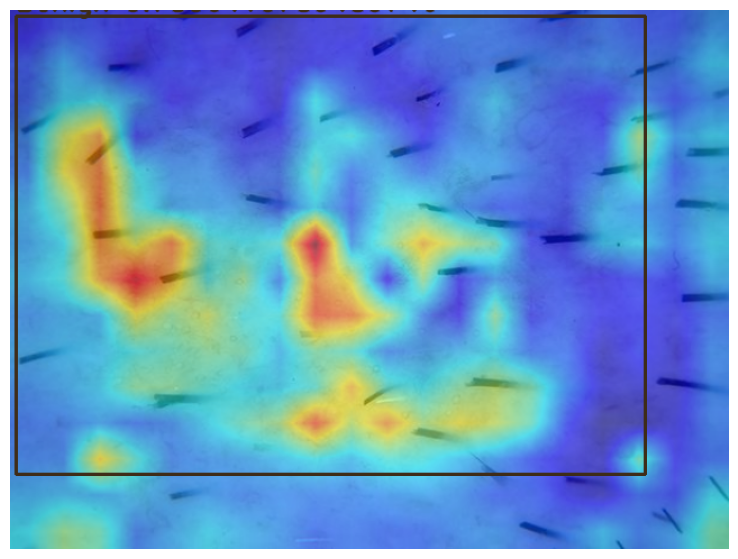

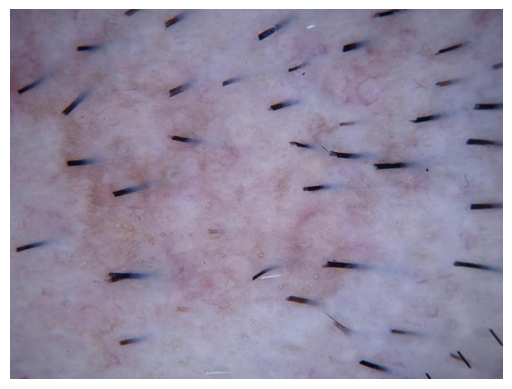

Image 4, with Ground Truth: Benign


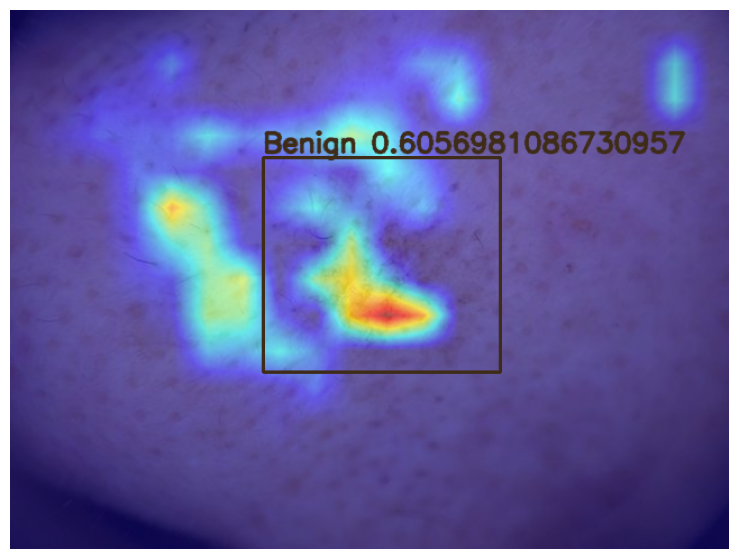

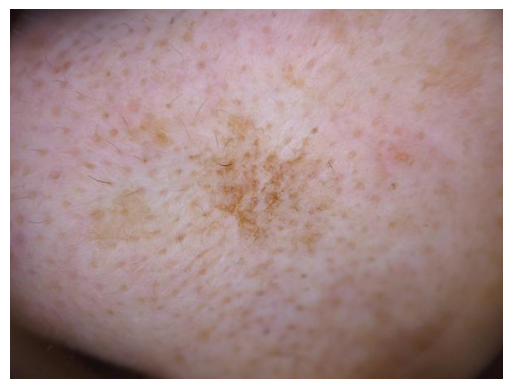

Image 5, with Ground Truth: Malignant


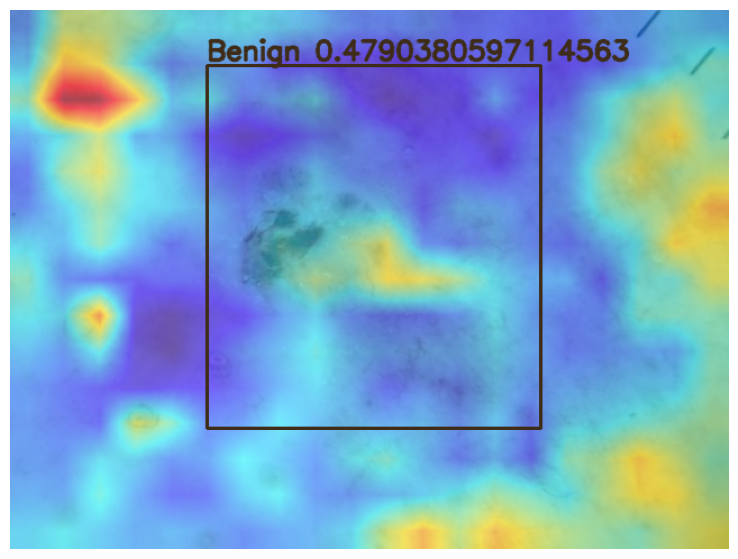

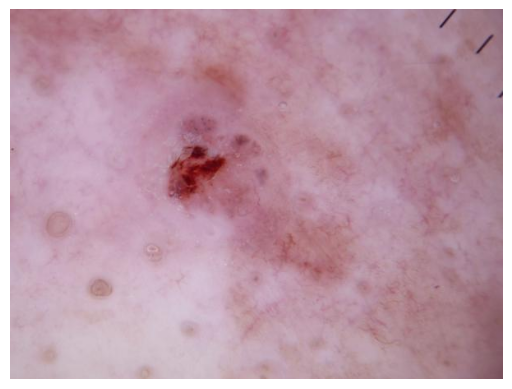

Image 6, with Ground Truth: Malignant


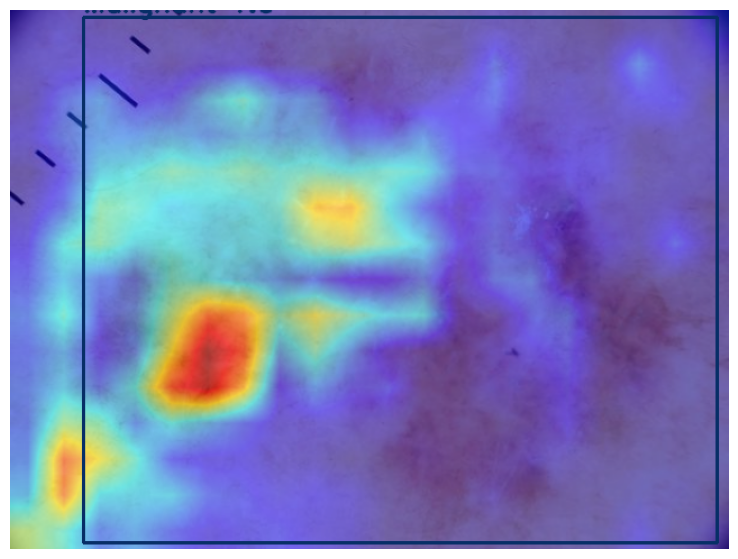

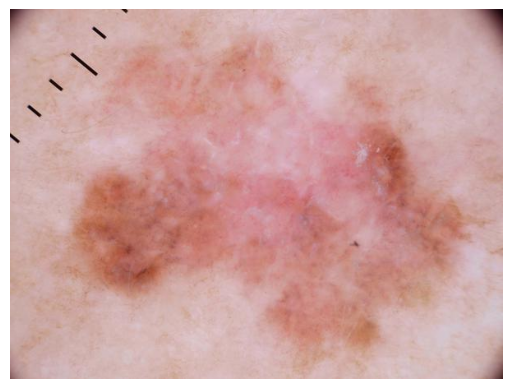

In [5]:
for i,image in enumerate(images):

    print(f"Image {i}, with Ground Truth: {ground_truths[i]}")
    display_images(image)
    img = cv2.imread(f"common_indices/image_{true_positives[i]}.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

